In [1]:
# api
import json
import requests

# sunrise and sunset
import datetime as dt
from astral.sun import sun
from astral import LocationInfo

# long and lat
from geopy.geocoders import Nominatim

# utils
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# prefs
plt.style.use('fivethirtyeight')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [2]:
# census api
api_get = 'C03002_003E,C03002_004E,C03002_005E,C03002_006E,C03002_007E,C03002_008E,C03002_009E,C03002_012E'
api_for = 'place:*'
with open('.census_api_key') as f:
    api_key = json.load(f)['api_key']
    
# construct api call
api_url = f'https://api.census.gov/data/2017/acs/acs1?get={api_get}&for={api_for}&key={api_key}'

# call the api and collect response
response = requests.get(api_url)

# name response columns
cols = ['White',
        'Black',
        'Indigenous',
        'Asian',
        'Pacific_Islander',
        'Other',
        'Mixed',
        'Hispanic',
        'State',
        'Place']

# load response text into census df
census = pd.DataFrame(json.loads(response.text)[1:], columns=cols)

In [3]:
# api
api_get = 'C03002_003E,C03002_004E,C03002_005E,C03002_006E,C03002_007E,C03002_008E,C03002_009E,C03002_012E'
api_for = 'place:*'
with open('.census_api_key') as f:
    api_key = json.load(f)['api_key']
    
# construct the api call we will use
api_url = f'https://api.census.gov/data/2017/acs/acs1?get={api_get}&for={api_for}&key={api_key}'

# call the api and collect the response
response = requests.get(api_url)

cols = ['White',
        'Black',
        'Indigenous',
        'Asian',
        'Pacific_Islander',
        'Other',
        'Mixed',
        'Hispanic',
        'State',
        'Place']

# philidelphia city and county are coextensive
census = pd.DataFrame(json.loads(response.text)[1:], columns=cols)
boston = census[(census.State=='25')&(census.Place=='07000')].astype('int').reset_index(drop=True)

# merge cols
boston.Other += boston.Indigenous + boston.Mixed
boston.Asian += boston.Pacific_Islander
boston = boston.drop(columns=['Indigenous', 'Pacific_Islander', 'Mixed', 'State', 'Place'])
boston_normed = round(boston/boston.iloc[0].sum(), 3)

# display pop. by race
print(f"{boston.columns[0]}\t{boston.columns[1]}\t{boston.columns[2]}\t{boston.columns[3]}\t{boston.columns[4]}")
print(f"{boston.values[0][0]}\t{boston.values[0][1]}\t{boston.values[0][2]}\t{boston.values[0][3]}\t{boston.values[0][4]}")
print(f"{boston_normed.values[0][0]}\t{boston_normed.values[0][1]}\t{boston_normed.values[0][2]}\t{boston_normed.values[0][3]}\t{boston_normed.values[0][4]}")
# print(pd.concat([boston, boston_normed]).reset_index().T.rename(columns={0:'Total Pop.', 1:'Percentage'}).T.drop(columns=['index'])) #<-- alt. way to display pop. table

White	Black	Asian	Other	Hispanic
300126	158080	66066	19250	139493
0.439	0.231	0.097	0.028	0.204


In [4]:
# boston lat and long centroid
address='Boston'
with open('.geopy_user_agent') as f:
    geopy_user_agent = json.load(f)['geopy_user_agent']

geolocator = Nominatim(user_agent=geopy_user_agent)
location = geolocator.geocode(address)
print((location.latitude, location.longitude))

(42.3602534, -71.0582912)


In [5]:
# read in police stops dataset
stops = pd.read_csv('data/boston-police-department-fio.csv')

display(stops.head(3))
stops.info()

,SEQ_NUM,FIO_ID,SEX,LOCATION,DIST,DIST_ID,FIO_DATE,FIO_TIME,PRIORS,DESCRIPTION,CLOTHING,COMPLEXION,FIOFS_TYPE,TERRORISM,SEARCH,BASIS,STOP_REASONS,ENTEREDBY,FIOFS_REASONS,OUTCOME,VEH_MAKE,VEH_YEAR_NUM,VEH_COLOR,VEH_MODEL,VEH_OCCUPANT,VEH_STATE,SUPERVISOR_ID,OFFICER_ID,SUPERVISOR,OFF_DIST_ID,OFF_DIST,OFFICER,SUP_ENTRYDATE,LAST_UPDATEBY,LAST_UPDATETIME,ETHNICITY,FIRST_INSERTTIME,ACTIVE_ID,RACE_ID,RACE_DESC,FIO_DATE_CORRECTED,AGE_AT_FIO_CORRECTED,STREET_ID,CITY
0,938283,621880,MALE,NORMANDY ST at SUPPLE RD,B2,3,12/10/2013 12:00:00 AM,12/10/2013 12:00:00 AM,YES,B(Black),"blk jacket, blk shirt, blue jeans, wht sneakers",Med,IOFS,NO,VP,CONSENT SEARCH,INVESTIGATIVE,11992.0,"DRUGS, INVESTIGATION",SFO,NISSAN,2012.0,SILVER,max,DRIVER,MA,10132.0,98656,JOHN D BRODERICK JR,9999,OTHER,Liam P Hawkins,12/08/2013 12:00:00 AM,11992.0,01/30/2014 12:00:00 AM,NaN,01/30/2014 12:00:00 AM,1,2,B(Black),12/10/2013 12:00:00 AM,59,3274,NO DATA ENTERED
1,881897,565177,MALE,75 BOYLSTON ST,A1,1,05/24/2012 12:00:00 AM,05/24/2012 12:00:00 AM,NO,W(White),"GRY. SWEATSHIRT, BLUE JEANS",Med,IO,NO,NaN,REASONABLE SUSPICION,RADIO CALL,51340.0,"DRUGS, POSSESSION",F,NO DATA ENTERED,0.0,NO DATA ENTERED,NaN,NaN,NO DATA ENTERED,8949.0,9765,PAUL R DONOVAN,1,A1,EDWARD J MACPHERSON,05/29/2012 12:00:00 AM,51340.0,06/06/2012 12:00:00 AM,NaN,06/06/2012 12:00:00 AM,1,4,W(White),05/24/2012 12:00:00 AM,26,543,OTHER
2,882060,565340,MALE,5 TOPLIFF ST,C11,5,06/04/2012 12:00:00 AM,06/04/2012 12:00:00 AM,YES,B(Black),"GRY SWEATSHIRT, GRY PANTS",Dark,IOF,NO,NaN,NaN,OTHER (SPECIFY),11672.0,"INVESTIGATE, PERSON",F,NO DATA ENTERED,0.0,NO DATA ENTERED,NaN,NaN,NO DATA ENTERED,11312.0,83575,KENNETH J GAINES,16,YVSF,James Conley,06/05/2012 12:00:00 AM,11672.0,06/07/2012 12:00:00 AM,NaN,06/07/2012 12:00:00 AM,1,2,B(Black),06/04/2012 12:00:00 AM,18,4493,NO DATA ENTERED


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152230 entries, 0 to 152229
Data columns (total 44 columns):
SEQ_NUM                 152230 non-null int64
FIO_ID                  152230 non-null int64
SEX                     152230 non-null object
LOCATION                152228 non-null object
DIST                    152230 non-null object
DIST_ID                 152230 non-null int64
FIO_DATE                152230 non-null object
FIO_TIME                152230 non-null object
PRIORS                  131331 non-null object
DESCRIPTION             152230 non-null object
CLOTHING                138761 non-null object
COMPLEXION              152230 non-null object
FIOFS_TYPE              152230 non-null object
TERRORISM               152230 non-null object
SEARCH                  20640 non-null object
BASIS                   35544 non-null object
STOP_REASONS            105322 non-null object
ENTEREDBY               98572 non-null float64
FIOFS_REASONS           152230 non-null object
O

In [6]:
# merge unentered, unknown, american indian/alaskan native, and middle eastern/east indian subject race
stops.RACE_DESC = np.where((stops.RACE_DESC == 'NO DATA ENTERED')
                      | (stops.RACE_DESC == 'UNKNOWN')
                      | (stops.RACE_DESC == 'I(American Indian or Alaskan Native)')
                      | (stops.RACE_DESC == 'M(Middle Eastern or East Indian)'),
                              'Other',
                              stops.RACE_DESC)

# rename white, black, hispanic, and asian subject race to match census format
conds = [stops.RACE_DESC == 'W(White)',
         stops.RACE_DESC == 'B(Black)',
         stops.RACE_DESC == 'H(Hispanic)',
         stops.RACE_DESC == 'A(Asian or Pacific Islander)']

stops.RACE_DESC = np.select(conds, ['White',
                               'Black',
                               'Hispanic',
                               'Asian'], stops.RACE_DESC)

In [7]:
# drop pedestrian stops
stops = stops[stops.VEH_COLOR != 'NO DATA ENTERED']

# display new number of stops
display(len(stops))

51176

In [8]:
# display stops by race
display("Stops by race",
        "num",
        stops.RACE_DESC.value_counts(),
        "prop",
        stops.RACE_DESC.value_counts(normalize=True))

'Stops by race'

'num'

Black       31161
White       10541
Hispanic    6988 
Other       2027 
Asian       459  
Name: RACE_DESC, dtype: int64

'prop'

Black       0.608899
White       0.205975
Hispanic    0.136548
Other       0.039608
Asian       0.008969
Name: RACE_DESC, dtype: float64

How to explain racial disparity?

In [9]:
# convert 'date' to date_time obj
stops.FIO_DATE_CORRECTED = pd.to_datetime(stops.FIO_DATE_CORRECTED)

# check stops per year per race
stops.groupby([stops.FIO_DATE_CORRECTED.map(lambda x: x.year), stops.RACE_DESC]).size()

FIO_DATE_CORRECTED  RACE_DESC
2011                Asian        110 
                    Black        6542
                    Hispanic     1589
                    Other        416 
                    White        2691
2012                Asian        121 
                    Black        7936
                    Hispanic     1782
                    Other        500 
                    White        3107
2013                Asian        115 
                    Black        6793
                    Hispanic     1402
                    Other        440 
                    White        2025
2014                Asian        97  
                    Black        7491
                    Hispanic     1728
                    Other        494 
                    White        2050
2015                Asian        16  
                    Black        2399
                    Hispanic     487 
                    Other        177 
                    White        668 
dtype: int64

This table has too many entries to digest quickly. Visualizing the stops per year per race will be more effective.

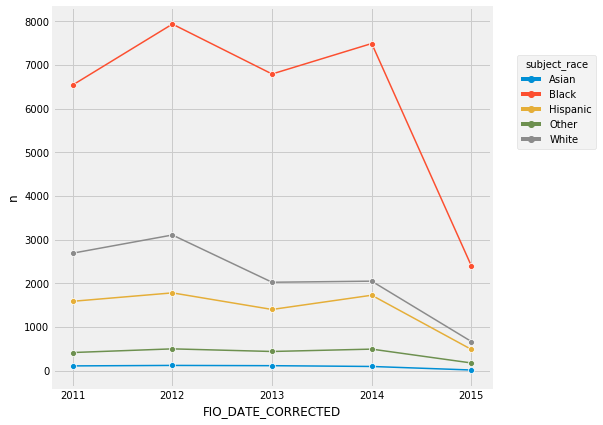

In [10]:
# visualize trend
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
sns.lineplot(data=stops.groupby([stops.FIO_DATE_CORRECTED.map(lambda x: x.year),
                                 stops.RACE_DESC]).size().unstack(level=1),
             dashes=False,
             markers=["o"]*5,
             linewidth=1.5)
# plt.setp(ax.lines, linewidth=2)
ax.set_xticks([2011, 2012, 2013, 2014, 2015])
ax.set_ylabel('n', )
plt.legend(loc='center right', title='subject_race', bbox_to_anchor=(1.25, .75))
plt.show()

Examine year 2014 -- Benchmark tests: establish baseline (are blacks stopped more because they make up more of the population?)

In [11]:
# get stops for year 2014 only
stops_2014 = stops[stops.FIO_DATE_CORRECTED.map(lambda x: x.year) == 2014]

# get stops per race for year 2014 only
race_2014 = pd.concat([stops_2014.groupby(stops.RACE_DESC).size(),
                boston.T], axis=1, sort=True)
race_2014.columns = ['n', 'num_people']

# get 2017 stop rate
race_2014['stop_rate'] = race_2014.n / race_2014.num_people

display(race_2014)

,n,num_people,stop_rate
Asian,97,66066,0.001468
Black,7491,158080,0.047387
Hispanic,1728,139493,0.012388
Other,494,19250,0.025662
White,2050,300126,0.006830


In [12]:
# black and white stop rates
display(race_2014.stop_rate['Black'] / race_2014.stop_rate['White'])

# black and hispanic stop rates
display(race_2014.stop_rate['Hispanic'] / race_2014.stop_rate['White'])

6.937653877011949

1.8135982275883065

In [13]:
# fill search nan values with 'N' for 'no search'
stops_2014.SEARCH.fillna('N', inplace=True)

# check search values
display(stops_2014.SEARCH.value_counts())

/Users/elliotmacy/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


N     9387
VP    1234
V     739 
P     500 
Name: SEARCH, dtype: int64

In [14]:
stops_2014.SEARCH = np.where(stops_2014.SEARCH!='N', 1, 0)
display(stops_2014.SEARCH.value_counts())

/Users/elliotmacy/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0    9387
1    2473
Name: SEARCH, dtype: int64

In [15]:
# get search rates per race
search = stops_2014.groupby('RACE_DESC').SEARCH.mean()

display(search)

RACE_DESC
Asian       0.144330
Black       0.223068
Hispanic    0.210069
Other       0.208502
White       0.157073
Name: SEARCH, dtype: float64

In [16]:
# black and white search rates
display(search['Black'] / search['White'])
        
# hispanic and white stfriskop rates
display(search['Hispanic'] / search['White'])

1.4201513866329036

1.3373986369910282

Problems with out benchmark test:

1. Our census pop. data doesn't capture what the distribution of driving behavior looks like (Boston residents != Boston drivers)

2. Rates of justifiable searches might also vary by race, so we need to check outcomes of searches (hit_rate)

In [17]:
stops_2014.OUTCOME.value_counts()

F      10731
FO     442  
SF     182  
S      143  
O      100  
SFO    47   
SO     4    
Name: OUTCOME, dtype: int64

In [18]:
stops_2014.OUTCOME = np.where((stops_2014.OUTCOME=='SF')
                              | (stops_2014.OUTCOME=='S')
                              | (stops_2014.OUTCOME=='SFO')
                              | (stops_2014.OUTCOME=='SO'), True, False)

stops_2014.OUTCOME.value_counts()

/Users/elliotmacy/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


False    11484
True     376  
Name: OUTCOME, dtype: int64

In [19]:
stops_2014[stops_2014.isna()==False].groupby(['RACE_DESC', 'OUTCOME']).size()

RACE_DESC  OUTCOME
Asian      False      94  
           True       3   
Black      False      7305
           True       186 
Hispanic   False      1651
           True       77  
Other      False      482 
           True       12  
White      False      1952
           True       98  
dtype: int64

In [20]:
searches_2014 = stops_2014[stops_2014.SEARCH==True]
dff = pd.DataFrame(searches_2014.groupby('RACE_DESC').OUTCOME.mean()).rename(columns={'contraband_found':'hit_rate'})
display(dff)

,OUTCOME
RACE_DESC,
Asian,0.142857
Black,0.068821
Hispanic,0.134986
Other,0.067961
White,0.130435


Are officers searching non-white drivers based on less evidence? Do hit rates vary by precint?

In [21]:
# examine hit rate by district
pd.DataFrame(searches_2014.groupby([searches_2014.RACE_DESC, searches_2014.DIST]).OUTCOME.mean()).rename(columns={'contraband_found':'hit_rate'})

OUTCOME
RACE_DESC DIST           
Asian     B3     0.500000
          C11    0.000000
          D4     0.333333
          E5     0.000000
Black     A1     0.250000
          A15    0.000000
          A7     0.000000
          Auto   0.000000
          B2     0.069030
          B3     0.016447
          BIKE   0.000000
          BMP    0.000000
          C11    0.080851
          C6     0.266667
          D14    0.666667
          D4     0.191489
          DCU    0.750000
          E13    0.055556
          E18    0.173913
          E5     0.000000
          OTHER  0.000000
          YVSF   0.000000
Hispanic  A1     0.000000
          A15    0.000000
          A7     0.142857
          B2     0.106383
          B3     0.095890
          C11    0.096774
          C6     0.181818
          D14    1.000000
          D4     0.244444
          DCU    0.333333
          E13    0.033333
          E18    0.285714
          E5     0.190476
Other     A1     0.000000
          A7     0.250000
          B2     0.027778
          B3     0.000000
          C11    0.166667
          D14    0.000000
          D4     0.142857
          DCU    0.000000
          E18    0.333333
          E5     0.000000
White     A1     0.000000
          A15    0.000000
          A7     0.071429
          B2     0.061224
          B3     0.014925
          C11    0.054545
          C6     0.448276
          D14    0.000000
          D4     0.327586
          DCU    0.333333
          E13    0.000000
          E18    0.000000
          E5     0.000000

In [23]:
# searches_2014 = searches_2014[~searches_2014.DIST.isin(('Auto', 'BIKE', 'BMP', 'YVSF', 'OTHER'))]

ddff = pd.DataFrame(searches_2014.groupby([searches_2014.RACE_DESC, searches_2014.DIST]).OUTCOME.mean()).rename(columns={'contraband_found':'hit_rate'}).unstack().T.melt(id_vars='White')
ddff = ddff[ddff.RACE_DESC.isin(['Black', 'Hispanic'])]
ddff.fillna(0, inplace=True)

ddff = ddff.set_index(pd.Index(np.tile(searches_2014.DIST.unique(), 2)))
ddff = ddff.rename(columns={'White':'white_hit_rate', 'value':'minority_hit_rate'})
ddff = ddff[ddff.white_hit_rate > 0]
ddff.sort_index()

,white_hit_rate,RACE_DESC,minority_hit_rate
B3,0.071429,Black,0.000000
B3,0.071429,Hispanic,0.142857
BIKE,0.333333,Black,0.750000
BIKE,0.333333,Hispanic,0.333333
C11,0.061224,Black,0.069030
C11,0.061224,Hispanic,0.106383
DCU,0.448276,Black,0.266667
DCU,0.448276,Hispanic,0.181818
E13,0.014925,Black,0.016447
E13,0.014925,Hispanic,0.095890


In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(x='white_hit_rate',
                y='minority_hit_rate',
                size=stops_2017.groupby('district').size(),
                data=ddff[ddff.subject_race=='Black'],
                edgecolor='black',
                color="white",
                sizes=(1, 400),                ax=ax[0]).set_title('Black')
ax[0].plot([-0.05, .85], [-0.05, .85], linewidth=0.5, linestyle='-.', color='k')

sns.scatterplot(x='white_hit_rate',
                y='minority_hit_rate',
                size=stops_2017.groupby('district').size(),
                data=ddff[ddff.subject_race=='Hispanic'],
                edgecolor='black',
                color="white",
                sizes=(1, 400),
                ax=ax[1]).set_title('Hispanic')
ax[1].plot([-0.05, .85], [-0.05, .85], linewidth=0.5, linestyle='-.', color='k')
plt.setp(ax, xlim=(-0.05, .85), ylim=(-0.05, .85))
ax[0].get_legend().remove()
ax[1].get_legend().remove()
plt.show()

In [ ]:
stops_2017[stops_2017.district == 77].location.value_counts()

In [ ]:
# compute citywide hit rates again with district 77 removed
searches_2017 = stops_2017[(stops_2017.search_conducted==True) & (stops_2017.district!=77)]
searches_2017.contraband_found = searches_2017.contraband_found.astype(bool)
dff = pd.DataFrame(searches_2017.groupby('subject_race').contraband_found.mean()).rename(columns={'contraband_found':'hit_rate'})
display(dff)

Veil of Darkness Test

In [ ]:
# set city location for sunrise and sunset
city = LocationInfo("Philadelphia",
                    "Pennsylvania",
                    "Eastern Standard Time", #<--- check which params are req'd
                    location.latitude,
                    location.longitude)

# convert time to datetime.time obj
stops_2017['time']    = stops_2017.time.apply(lambda x: pd.to_datetime(x).time())
                     
# add sunset and dusk
stops_2017['Sunset']  = stops_2017.date.apply(lambda x: sun(city.observer, x, tzinfo='EST')["sunset"].time())
stops_2017['Dusk']    = stops_2017.date.apply(lambda x: sun(city.observer, x, tzinfo='EST')["dusk"].time())

# calculate whether or not stop is after dusk
stops_2017['is_dark'] = stops_2017.time > stops_2017.Dusk

# drop stops is subject is neither black nor white
stops_2017 = stops_2017.loc[(stops_2017.subject_race=='Black') | (stops_2017.subject_race=='White')]

# drop stops if stop time is before/after annual sunset.min()/dusk.max()
stops_2017 = stops_2017.loc[(stops_2017.time > stops_2017.Sunset.min()) & (stops_2017.time < stops_2017.Dusk.max())]

# drop stops if stop is after sunset for that date but before dusk for that date
stops_2017 = stops_2017.loc[(stops_2017.time < stops_2017.Sunset) | (stops_2017.time > stops_2017.Dusk)]

In [ ]:
aaa = stops_2017.loc[(stops_2017.time >= pd.to_datetime('17:30:00').time()) & (stops_2017.time < pd.to_datetime('18:00:00').time())]
bbb = stops_2017.loc[(stops_2017.time >= pd.to_datetime('18:00:00').time()) & (stops_2017.time < pd.to_datetime('18:30:00').time())]
ccc = stops_2017.loc[(stops_2017.time >= pd.to_datetime('18:30:00').time()) & (stops_2017.time < pd.to_datetime('19:00:00').time())]
ddd = stops_2017.loc[(stops_2017.time >= pd.to_datetime('19:00:00').time()) & (stops_2017.time < pd.to_datetime('19:30:00').time())]
eee = stops_2017.loc[(stops_2017.time >= pd.to_datetime('19:30:00').time()) & (stops_2017.time < pd.to_datetime('20:00:00').time())]
fff = stops_2017.loc[(stops_2017.time >= pd.to_datetime('20:00:00').time()) & (stops_2017.time < pd.to_datetime('20:30:00').time())]

In [ ]:
aaa['is_black'] = aaa.subject_race=='Black'
bbb['is_black'] = bbb.subject_race=='Black'
ccc['is_black'] = ccc.subject_race=='Black'
ddd['is_black'] = ddd.subject_race=='Black'
eee['is_black'] = eee.subject_race=='Black'
fff['is_black'] = fff.subject_race=='Black'

In [ ]:
print(
    aaa.groupby('is_dark').is_black.mean(),
    bbb.groupby('is_dark').is_black.mean(),
    ccc.groupby('is_dark').is_black.mean(),
    ddd.groupby('is_dark').is_black.mean(),
    eee.groupby('is_dark').is_black.mean()
)

# o